<span style="color:magenta; font-weight:bold">Import the necessary libraries</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="color:magenta; font-weight:bold">Use Pandas to read the 2 dataframes (1st is the OWID_Energy Database and 2nd one is OWID_CO2 Database)</span>

In [6]:
energy_df = pd.read_csv('./energy-data-master/owid-energy-data.csv', sep=',')

In [8]:
CO2_df = pd.read_csv('./energy-data-master/owid-co2-data.csv', sep=',')

<span style="color:magenta; font-weight:bold">1. Explore the OWID_Energy_Data base and decide which indicators I care about</span>

In [11]:
energy_df.head(1)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


<span style="color:magenta; font-weight:bold">1.1 Which indicators do I care about from the OWID_Energy Database? </span>

gdp = international -$ in 2011 prices 


fossil_fuel_consumption = terawatt-hours (coal, oil and natural gas)

coal_consumption = terawatt-hours
gas_consumption = terawatt-hours
oil_consumption = terawatt-hours


renewables_consumption = terawatt-hours  (solar,wind, hydropower, biofuels, other_renewable)
low_carbon_consumption = terawatt-hours  (renewables + nuclear power, they produce less greenhouse-gas emissions than fossil fuels)

solar_consumption = terawatt-hours
wind_consumption = terawatt-hours
hydro_consumption = terawatt-hours (from hydropower)
biofuel_consumption = terawatt-hours
other_renewable_consumption = terawatt-hours (geothermal, Tidal and wave energy, Advanced biomass)
nuclear_consumption = terawatt-hours

<span style="color:magenta; font-weight:bold">1.2Filter out the indicators I care about in the OWID_Energy database</span>

In [16]:
energy_df = energy_df[['country','year','population', 'fossil_fuel_consumption', 'coal_consumption','gas_consumption','oil_consumption','renewables_consumption','low_carbon_consumption','solar_consumption','wind_consumption','hydro_consumption','biofuel_consumption','other_renewable_consumption','nuclear_consumption']]
energy_df.head()                       

,country,year,population,fossil_fuel_consumption,coal_consumption,gas_consumption,oil_consumption,renewables_consumption,low_carbon_consumption,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,nuclear_consumption
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:magenta; font-weight:bold">2. Explore the OWID_CO2_Data base and decide which indicators I care about</span>

In [19]:
CO2_df.head(1)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style="color:magenta; font-weight:bold">2.1 Which indicators do I care about from the OWID_CO2 Database? </span>

country
year

co2 = million tonnes

co2_including_luc = million tonnes (including land use change and forestry)

total_ghg_excluding_lucf = million tonnes 
total_ghg = million tonnes

<span style="color:magenta; font-weight:bold">2.2Filter out the indicators I care about in the OWID_CO2 database</span>

In [25]:
CO2_df = CO2_df[['country','year','co2','co2_including_luc', 'total_ghg_excluding_lucf', 'total_ghg']]
CO2_df.head(1)  

,country,year,co2,co2_including_luc,total_ghg_excluding_lucf,total_ghg
0,Afghanistan,1850,NaN,NaN,NaN,NaN


<span style="color:magenta; font-weight:bold">3. Which unique countries do I have in both Data bases?</span>

In [28]:
energy_countries = energy_df['country'].unique()
energy_countries.sort()
EC_list = energy_countries.tolist()
EC_list
print('EC_list has', len(EC_list), 'countries')

CO2_countries = CO2_df['country'].unique()
CO2_countries.sort()
CC_list = CO2_countries.tolist()
CC_list
print('CC_list has', len(CC_list), 'countries')
#len(CO2_countries)

EC_list has 294 countries
CC_list has 261 countries


In [30]:
common_list = []
for i in CC_list:
    if i in EC_list:
        common_list.append(i)

In [32]:
common_list2 = common_list
for i in EC_list:
    if i in CC_list:
        common_list2.append(i)
common_list2 = list(set(common_list2))
common_list2 = sorted(common_list2)
len(common_list2)
#common_list2


219

<span style="color:magenta; font-weight:bold">4. Keep the common countries in both databases </span>

In [35]:
energy_df_2 = energy_df[energy_df['country'].isin(common_list2)]
energy_df_2
print(len(energy_df_2['country'].unique()))

CO2_df_2 = CO2_df[CO2_df['country'].isin(common_list2)]
CO2_df_2
print(len(CO2_df_2['country'].unique()))


219
219


<span style="color:magenta; font-weight:bold">5. Merge both data frames </span>

In [383]:
energy_CO2_df = pd.merge(energy_df_2, CO2_df_2, on=['country','year'], how='inner')
energy_CO2_df
Continents = ['Africa','Asia','North America', 'South America', 'Antarctica', 'Europe', 'Oceania','World']
df = energy_CO2_df[energy_CO2_df['country'].isin(Continents)]


df_World = df[df['country']=='World']
df_Africa = df[df['country']=='Africa']
df_Asia = df[df['country']=='Asia']
df_North_America = df[df['country']=='North America']
df_South_America = df[df['country']=='South America']
df_Antarctica = df[df['country']=='Antarctica']
df_Oceania = df[df['country']=='Oceania']
df_Europe = df[df['country']=='Europe']

population_2022_Continents = df[df['year']==2022][['country','population']]
population_2022_Continents['population %'] = population_2022_Continents['population']/7.975105e+09*100
population_2022_Continents 
#Which unique countries are there?
#print(energy_CO2_df['country'].unique())

,country,population,population %
245,Africa,1.426737e+09,17.889879
1013,Asia,4.721383e+09,59.201520
5435,Europe,7.448070e+08,9.339150
11590,North America,6.003237e+08,7.527470
11992,Oceania,4.503886e+07,0.564743
14279,South America,4.368167e+08,5.477253
17295,World,7.975105e+09,100.000000


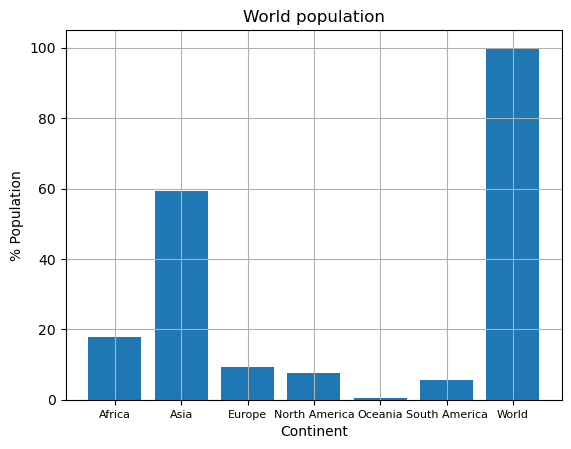

In [401]:
plt.bar(population_2022_Continents['country'], population_2022_Continents['population %'])
plt.xlabel('Continent')
plt.xticks(fontsize=8)
plt.ylabel('% Population')
plt.title('World population')
plt.grid()

<span style="color:magenta; font-weight:bold">5. How do the world CO2 emmisions look during the years?</span>

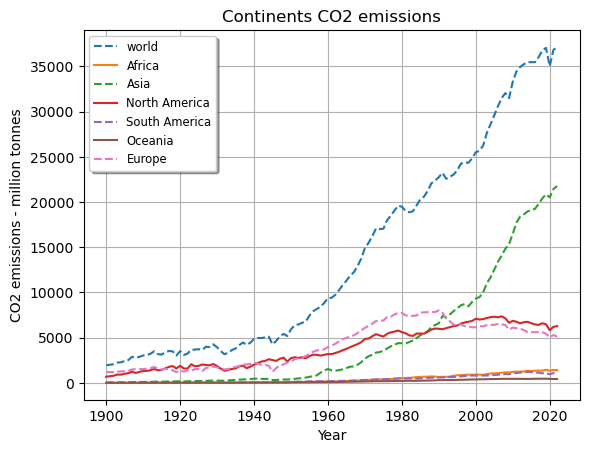

In [375]:
plt.plot(df_World['year'].values, df_World['co2'].values, '--',label ='world')
plt.plot(df_Africa['year'].values, df_Africa['co2'].values, label = 'Africa')
plt.plot(df_Asia['year'].values, df_Asia['co2'].values, '--',label = 'Asia')
plt.plot(df_North_America['year'].values, df_North_America['co2'].values, label='North America')
plt.plot(df_South_America['year'].values, df_South_America['co2'].values,'--', label = 'South America')
#plt.plot(df_Antarctica['year'].values, df_Antarctica['co2'].values, label = 'Antarctica')
plt.plot(df_Oceania['year'].values, df_Oceania['co2'].values, label='Oceania')
plt.plot(df_Europe['year'].values, df_Europe['co2'].values, '--', label = 'Europe')
plt.grid()
plt.xlabel('Year')
plt.ylabel('CO2 emissions - million tonnes')
plt.title('Continents CO2 emissions')

legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'small'})


<span style="color:magenta; font-weight:bold">6. How do Europe CO2 emmisions and energy look like since 1965 (no energy data before 1965)?</span>

In [575]:
years = list(range(2000,2024))
df_Europe_recent = df_Europe[df_Europe['year'].isin(years)]

df_Europe_recent.head(1)


,country,year,population,fossil_fuel_consumption,coal_consumption,gas_consumption,oil_consumption,renewables_consumption,low_carbon_consumption,solar_consumption,wind_consumption,hydro_consumption,biofuel_consumption,other_renewable_consumption,nuclear_consumption,co2,co2_including_luc,total_ghg_excluding_lucf,total_ghg
5413,Europe,2000,727917165.0,25336.162,5587.135,9259.316,10489.71,2422.432,5768.725,0.22,66.273,2220.522,6.915,128.501,3346.293,6155.591,5941.879,7659.18,7063.08


In [577]:
num_df_Europe_recent = df_Europe_recent.select_dtypes(include=['number'])
num_df_Europe_recent.corr()['co2']
#df_Europe_recent.corr()

year                          -0.900038
population                    -0.892948
fossil_fuel_consumption        0.993628
coal_consumption               0.949935
gas_consumption                0.636561
oil_consumption                0.929900
renewables_consumption        -0.947646
low_carbon_consumption        -0.918470
solar_consumption             -0.949645
wind_consumption              -0.939809
hydro_consumption              0.084110
biofuel_consumption           -0.852934
other_renewable_consumption   -0.887394
nuclear_consumption            0.952535
co2                            1.000000
co2_including_luc              0.915465
total_ghg_excluding_lucf       0.993155
total_ghg                      0.872928
Name: co2, dtype: float64

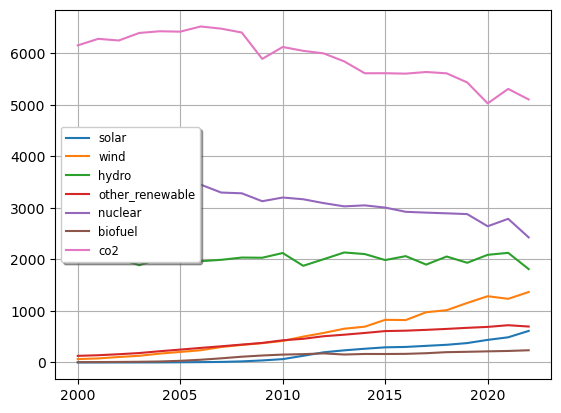

In [581]:
#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['co2'].values)
#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['total_ghg'].values)

#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['fossil_fuel_consumption'].values)
plt.plot(df_Europe_recent['year'].values, df_Europe_recent['solar_consumption'].values, label = 'solar')
plt.plot(df_Europe_recent['year'].values, df_Europe_recent['wind_consumption'].values, label = 'wind')
plt.plot(df_Europe_recent['year'].values, df_Europe_recent['hydro_consumption'].values, label='hydro')
plt.plot(df_Europe_recent['year'].values, df_Europe_recent['other_renewable_consumption'].values, label ='other_renewable')
plt.plot(df_Europe_recent['year'].values, df_Europe_recent['nuclear_consumption'].values, label='nuclear')
plt.plot(df_Europe_recent['year'].values, df_Europe_recent['biofuel_consumption'].values, label ='biofuel')
plt.plot(df_Europe_recent['year'].values, df_Europe_recent['co2'].values, label ='co2')
#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['coal_consumption'].values, '--', label ='coal')
#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['gas_consumption'].values, '--',label ='gas')
#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['oil_consumption'].values, '--',label ='oil')

legend = plt.legend(loc = 'center left', 
                    shadow=True,
                    prop={'weight':'roman','size':'small'})


#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['low_carbon_consumption'].values)
#plt.plot(df_Europe_recent['year'].values, df_Europe_recent['renewables_consumption'].values)

plt.grid()

#plt.xlim(left=-20)
#plt.ylim(bottom=-2)
#plt.axis([2000,2030, -2, 000])



<span style="color:magenta; font-weight:bold">7. Do a linear regresssion of facgtors that matter</span>

<span style="color:magenta; font-weight:bold">7. Do a linear regresssion of facgtors that matter</span>

In [583]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
#df_Europe_recent.columns
#df_Europe_recent.head()
df_Europe_recent.to_csv('ejempl.csv', index=False)

In [587]:
df_Europe_IMP = df_Europe_recent[['population','fossil_fuel_consumption','coal_consumption', 'gas_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'nuclear_consumption', 'co2']]
df_Europe_IMP.isnull().any()
                                  

population                     False
fossil_fuel_consumption        False
coal_consumption               False
gas_consumption                False
oil_consumption                False
solar_consumption              False
wind_consumption               False
hydro_consumption              False
biofuel_consumption            False
other_renewable_consumption    False
nuclear_consumption            False
co2                            False
dtype: bool

<span style="color:magenta; font-weight:bold">7.1 Define features</span>

In [637]:
#features = ['coal_consumption', 'gas_consumption', 'oil_consumption', 'solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'nuclear_consumption']
features = ['fossil_fuel_consumption','solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'nuclear_consumption']

features

['fossil_fuel_consumption',
 'solar_consumption',
 'wind_consumption',
 'hydro_consumption',
 'biofuel_consumption',
 'other_renewable_consumption',
 'nuclear_consumption']

<span style="color:magenta; font-weight:bold">7.2 Specify pred target</span>

In [640]:
target = ['co2']
target


['co2']

<span style="color:magenta; font-weight:bold">7.3 Define df for X and y</span>

In [643]:
X = df_Europe_recent[features]
y = df_Europe_recent[target]

<span style="color:magenta; font-weight:bold">7.4 Split</span>

In [646]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [648]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [650]:
y_test

,co2
5434,5310.309
5425,5999.425
5430,5638.487
5428,5614.495
5427,5614.210


In [652]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[5206.70271269],
       [5935.83437484],
       [5637.70371573],
       [5525.15422156],
       [5562.09971003]])

In [654]:
coefficients = regressor.coef_
print(features)
print(coefficients)

['fossil_fuel_consumption', 'solar_consumption', 'wind_consumption', 'hydro_consumption', 'biofuel_consumption', 'other_renewable_consumption', 'nuclear_consumption']
[[ 0.23799583 -0.24133032 -0.16252614 -0.00210605 -0.6881053   0.30028878
  -0.07612325]]


In [656]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

71.38053085529567


In [658]:
r2 = r2_score(y_true = y_test, y_pred = y_prediction)
r2


0.8934481451513782

In [625]:
import pandas as pd
import numpy as np
import cvxpy as cp
from sklearn.model_selection import train_test_split

# Features and Target
features = ['fossil_fuel_consumption',
            'solar_consumption', 'wind_consumption', 'hydro_consumption',
            'biofuel_consumption', 'nuclear_consumption']
target = ['co2']

# Splitting Data
X = df_Europe_recent[features].values
y = df_Europe_recent[target].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define Coefficients as Variables
n_features = X_train.shape[1]
coefficients = cp.Variable(n_features)

# Define Objective (Minimize Mean Squared Error)
objective = cp.Minimize(cp.sum_squares(X_train @ coefficients - y_train))

# Define Constraints
positive_features = ['fossil_fuel_consumption']
negative_features = ['solar_consumption', 'wind_consumption', 'hydro_consumption',
                     'biofuel_consumption', 'nuclear_consumption']

constraints = []
for i, feature in enumerate(features):
    if feature in positive_features:
        constraints.append(coefficients[i] >= 0)  # Positive Coefficients
    elif feature in negative_features:
        constraints.append(coefficients[i] <= -0.05)  # Negative Coefficients

# Solve the Problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Display Results
print("Coefficients:")
for feature, coef in zip(features, coefficients.value):
    print(f"{feature}: {coef:.2f}")

Coefficients:
fossil_fuel_consumption: 0.26
solar_consumption: -0.05
wind_consumption: -0.10
hydro_consumption: -0.05
biofuel_consumption: -0.11
nuclear_consumption: -0.05


In [627]:
r2 = r2_score(y_true = y_test, y_pred = y_prediction)
r2

-3.0249764393554655

In [939]:


pip install cvxpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
